In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv("customer_shopping_data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'customer_shopping_data.csv'

In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year
df['total_value'] = df['quantity'] * df['price']
df['year_month'] = df['invoice_date'].dt.to_period('M')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,total_value,year_month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022,7502.00,2022-08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021,5401.53,2021-12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021,300.08,2021-11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,15004.25,2021-05
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021,242.40,2021-10


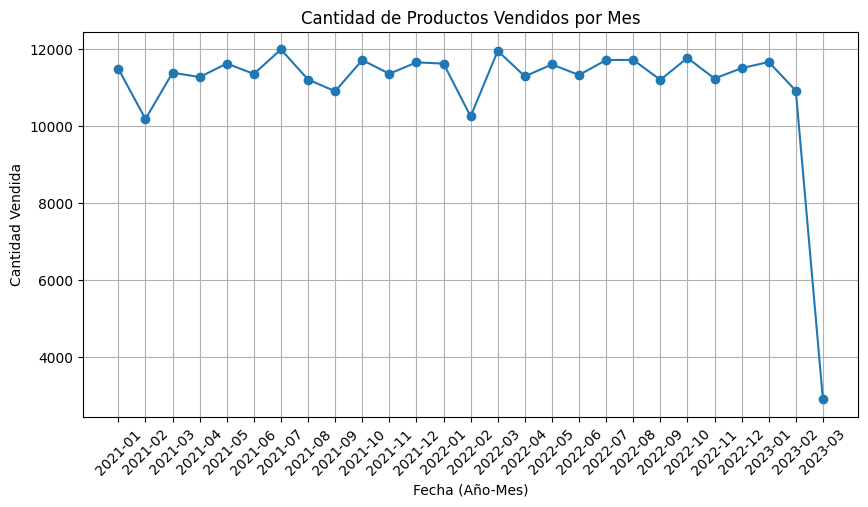

In [ ]:
df_grouped_monthly = df.groupby('year_month')['quantity'].sum().reset_index()

# Convertir year_month a string para mejor visualización en el gráfico
df_grouped_monthly['year_month'] = df_grouped_monthly['year_month'].astype(str)

# Graficar
plt.figure(figsize=(10,5))
plt.plot(df_grouped_monthly['year_month'], df_grouped_monthly['quantity'], marker='o', linestyle='-')

# Configuración del gráfico
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Cantidad Vendida")
plt.title("Cantidad de Productos Vendidos por Mes")
plt.xticks(rotation=45)
plt.grid()

# Mostrar la gráfica
plt.show()


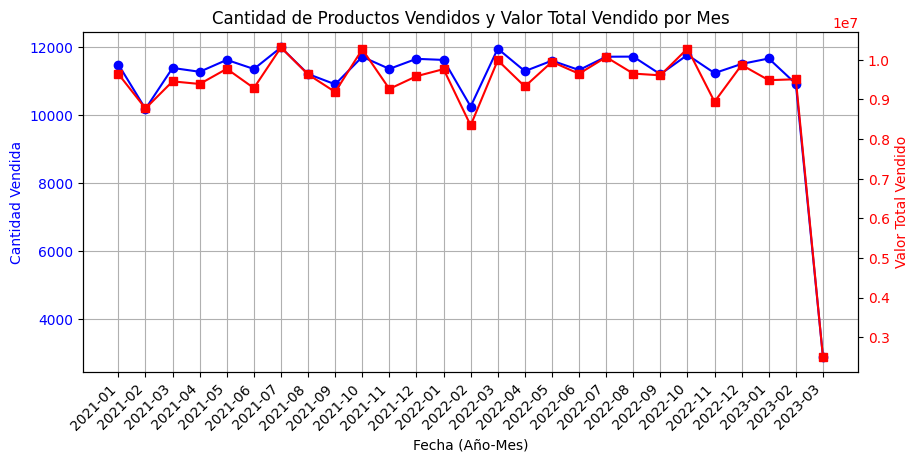

In [ ]:
df_grouped_monthly = df.groupby('year_month').agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()

df_grouped_monthly['year_month'] = df_grouped_monthly['year_month'].astype(str)

fig, ax1 = plt.subplots(figsize=(10,5))

# Graficar la cantidad vendida en el primer eje (izquierda)
ax1.plot(df_grouped_monthly['year_month'], df_grouped_monthly['quantity'], marker='o', linestyle='-', color='b', label='Cantidad Vendida')
ax1.set_xlabel("Fecha (Año-Mes)")
ax1.set_ylabel("Cantidad Vendida", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje para el total vendido (derecha)
ax2 = ax1.twinx()
ax2.plot(df_grouped_monthly['year_month'], df_grouped_monthly['total_value'], marker='s', linestyle='-', color='r', label='Valor Total Vendido')
ax2.set_ylabel("Valor Total Vendido", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Títulos y configuración
plt.title("Cantidad de Productos Vendidos y Valor Total Vendido por Mes")
fig.autofmt_xdate(rotation=45)
ax1.grid()

# Mostrar la gráfica
plt.show()

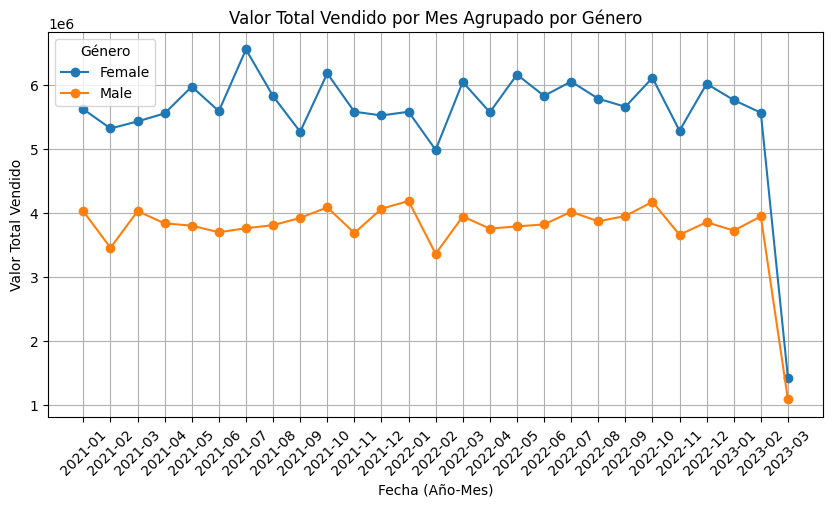

In [ ]:
df['year_month'] = df['invoice_date'].dt.strftime('%Y-%m')

# Agrupar por año-mes y género, sumando el valor total vendido
df_grouped_gender_monthly = df.groupby(['year_month', 'gender'])['total_value'].sum().reset_index()

# Crear la figura y el eje
plt.figure(figsize=(10, 5))

# Graficar líneas para cada género
for gender in df_grouped_gender_monthly['gender'].unique():
    df_filtered = df_grouped_gender_monthly[df_grouped_gender_monthly['gender'] == gender]
    plt.plot(df_filtered['year_month'], df_filtered['total_value'], marker='o', linestyle='-', label=gender)

# Configuración del gráfico
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Valor Total Vendido")
plt.title("Valor Total Vendido por Mes Agrupado por Género")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.grid()

# Mostrar la gráfica
plt.show()

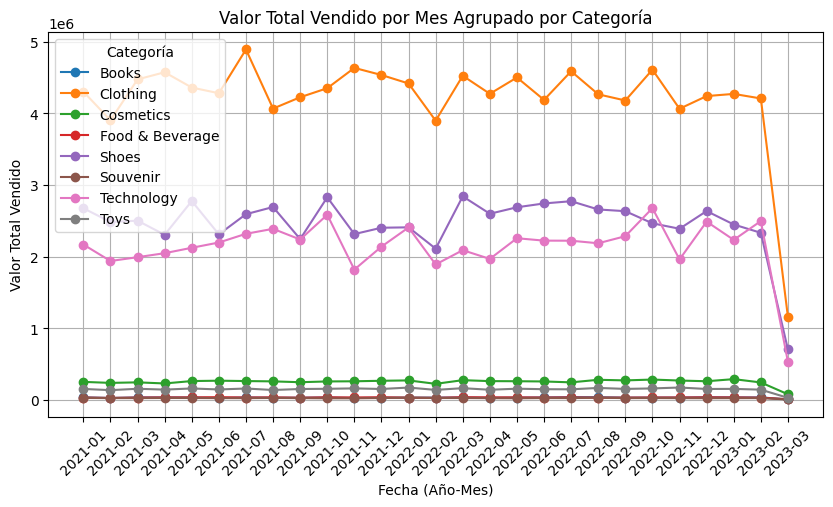

In [ ]:
df_grouped_category_monthly = df.groupby(['year_month', 'category'])['total_value'].sum().reset_index()

# Crear la figura y el eje
plt.figure(figsize=(10, 5))

# Graficar líneas para cada categoría
for category in df_grouped_category_monthly['category'].unique():
    df_filtered = df_grouped_category_monthly[df_grouped_category_monthly['category'] == category]
    plt.plot(df_filtered['year_month'], df_filtered['total_value'], marker='o', linestyle='-', label=category)

# Configuración del gráfico
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Valor Total Vendido")
plt.title("Valor Total Vendido por Mes Agrupado por Categoría")
plt.xticks(rotation=45)
plt.legend(title="Categoría")
plt.grid()

# Mostrar la gráfica
plt.show()

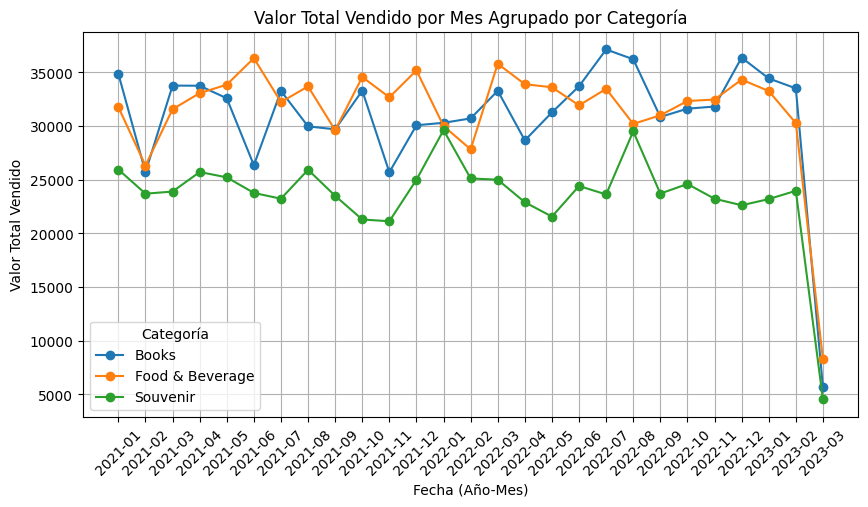

In [ ]:
df_grouped_category_monthly = df.groupby(['year_month', 'category'])['total_value'].sum().reset_index()

## delete categories
df_grouped_category_monthly = df_grouped_category_monthly[df_grouped_category_monthly['category'] != 'Clothing']
df_grouped_category_monthly = df_grouped_category_monthly[df_grouped_category_monthly['category'] != 'Shoes']
df_grouped_category_monthly = df_grouped_category_monthly[df_grouped_category_monthly['category'] != 'Technology']

df_grouped_category_monthly = df_grouped_category_monthly[df_grouped_category_monthly['category'] != 'Cosmetics']
df_grouped_category_monthly = df_grouped_category_monthly[df_grouped_category_monthly['category'] != 'Toys']


# Crear la figura y el eje
plt.figure(figsize=(10, 5))

# Graficar líneas para cada categoría
for category in df_grouped_category_monthly['category'].unique():
    df_filtered = df_grouped_category_monthly[df_grouped_category_monthly['category'] == category]
    plt.plot(df_filtered['year_month'], df_filtered['total_value'], marker='o', linestyle='-', label=category)

# Configuración del gráfico
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Valor Total Vendido")
plt.title("Valor Total Vendido por Mes Agrupado por Categoría")
plt.xticks(rotation=45)
plt.legend(title="Categoría")
plt.grid()

# Mostrar la gráfica
plt.show()

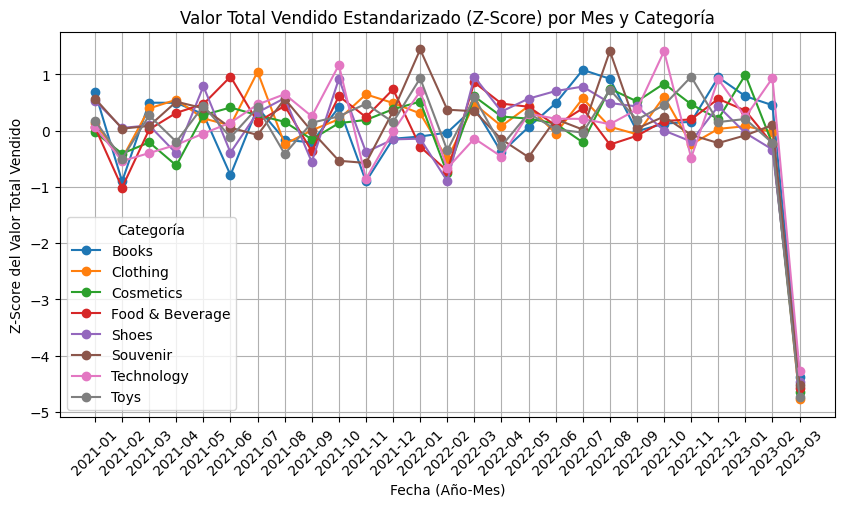

In [ ]:
from scipy.stats import zscore

df_grouped_category_monthly = df.groupby(['year_month', 'category'])['total_value'].sum().reset_index()

# Aplicar Z-Score a la columna 'total_value' por categoría
df_grouped_category_monthly['zscore_total_value'] = df_grouped_category_monthly.groupby('category')['total_value'].transform(zscore)

# Crear la figura y el eje
plt.figure(figsize=(10, 5))

# Graficar líneas para cada categoría con valores estandarizados
for category in df_grouped_category_monthly['category'].unique():
    df_filtered = df_grouped_category_monthly[df_grouped_category_monthly['category'] == category]
    plt.plot(df_filtered['year_month'], df_filtered['zscore_total_value'], marker='o', linestyle='-', label=category)

# Configuración del gráfico
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Z-Score del Valor Total Vendido")
plt.title("Valor Total Vendido Estandarizado (Z-Score) por Mes y Categoría")
plt.xticks(rotation=45)
plt.legend(title="Categoría")
plt.grid()

# Mostrar la gráfica
plt.show()

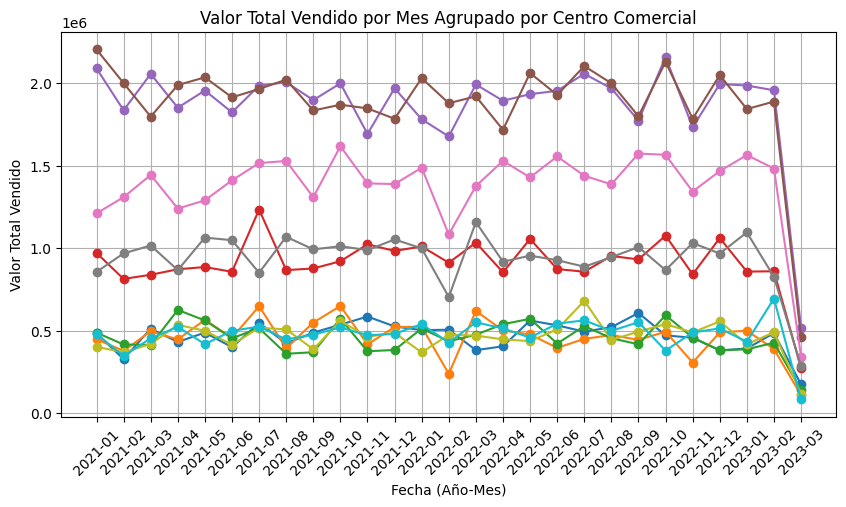

In [ ]:
df_grouped_mall_monthly = df.groupby(['year_month', 'shopping_mall'])['total_value'].sum().reset_index()

# Crear la figura y el eje para la gráfica sin estandarizar
plt.figure(figsize=(10, 5))

# Graficar líneas para cada centro comercial
for mall in df_grouped_mall_monthly['shopping_mall'].unique():
    df_filtered = df_grouped_mall_monthly[df_grouped_mall_monthly['shopping_mall'] == mall]
    plt.plot(df_filtered['year_month'], df_filtered['total_value'], marker='o', linestyle='-', label=mall)

# Configuración del gráfico
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Valor Total Vendido")
plt.title("Valor Total Vendido por Mes Agrupado por Centro Comercial")
plt.xticks(rotation=45)
#plt.legend(title="Centro Comercial")
plt.grid()

# Mostrar la gráfica
plt.show()

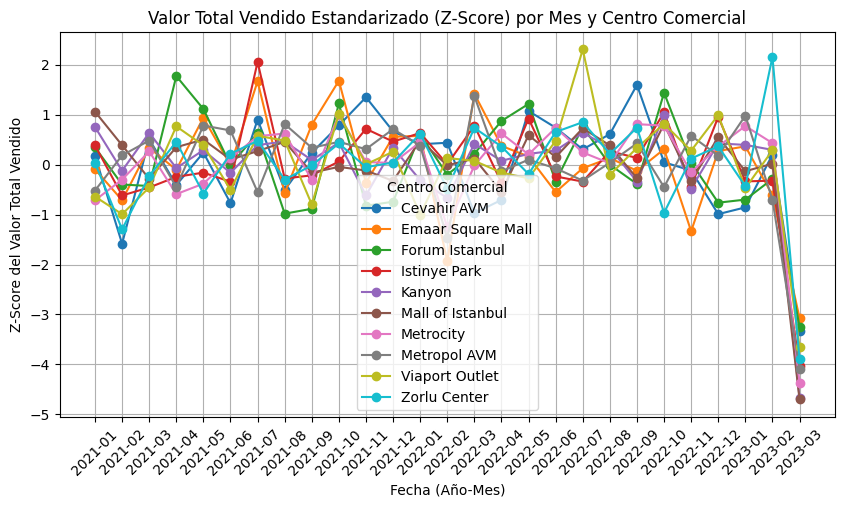

In [ ]:
df_grouped_mall_monthly['zscore_total_value'] = df_grouped_mall_monthly.groupby('shopping_mall')['total_value'].transform(zscore)

# Crear la figura y el eje para la gráfica estandarizada
plt.figure(figsize=(10, 5))

# Graficar líneas para cada centro comercial con valores estandarizados
for mall in df_grouped_mall_monthly['shopping_mall'].unique():
    df_filtered = df_grouped_mall_monthly[df_grouped_mall_monthly['shopping_mall'] == mall]
    plt.plot(df_filtered['year_month'], df_filtered['zscore_total_value'], marker='o', linestyle='-', label=mall)

# Configuración del gráfico
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Z-Score del Valor Total Vendido")
plt.title("Valor Total Vendido Estandarizado (Z-Score) por Mes y Centro Comercial")
plt.xticks(rotation=45)
plt.legend(title="Centro Comercial")
plt.grid()

# Mostrar la gráfica
plt.show()

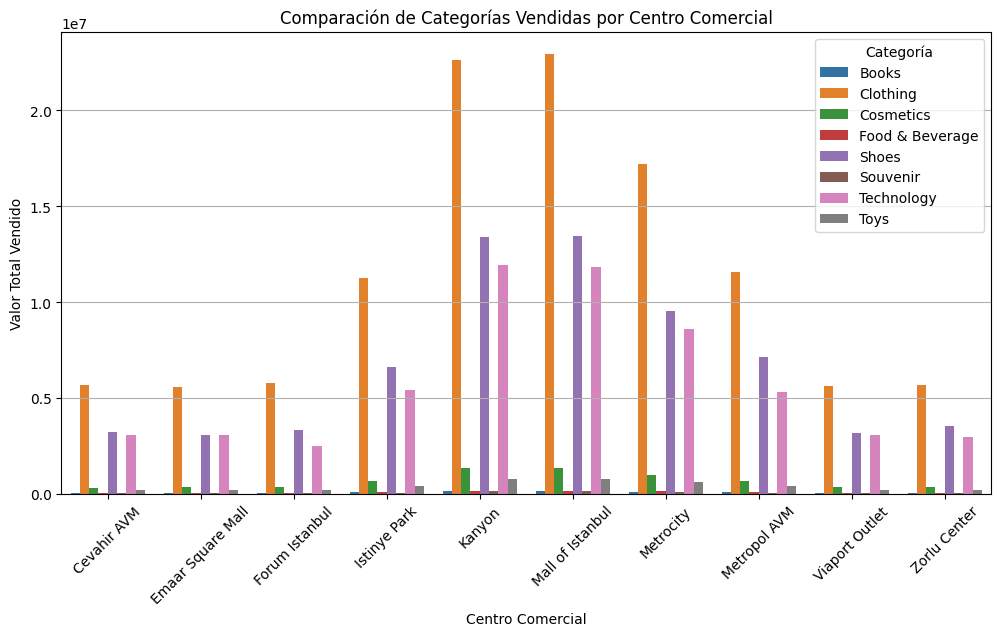

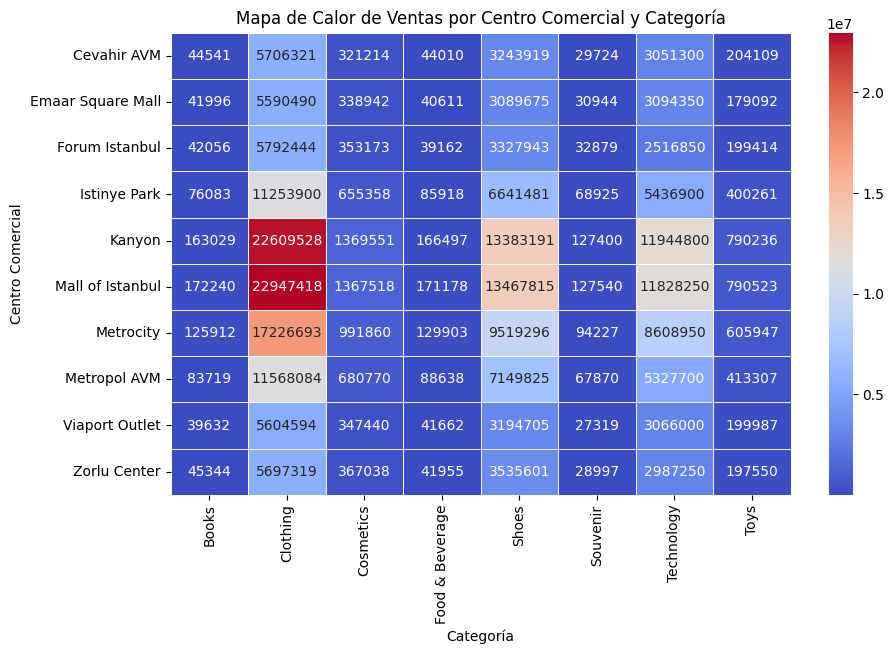

In [ ]:
# Agrupar por shopping_mall y categoría, sumando el valor total vendido
df_grouped_mall_category = df.groupby(['shopping_mall', 'category'])['total_value'].sum().reset_index()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12,6))
sns.barplot(x='shopping_mall', y='total_value', hue='category', data=df_grouped_mall_category)

# Configuración del gráfico
plt.xlabel("Centro Comercial")
plt.ylabel("Valor Total Vendido")
plt.title("Comparación de Categorías Vendidas por Centro Comercial")
plt.xticks(rotation=45)
plt.legend(title="Categoría")
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

# Crear un mapa de calor (heatmap)
df_pivot = df_grouped_mall_category.pivot(index='shopping_mall', columns='category', values='total_value').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(df_pivot, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5)

# Configuración del gráfico
plt.xlabel("Categoría")
plt.ylabel("Centro Comercial")
plt.title("Mapa de Calor de Ventas por Centro Comercial y Categoría")

# Mostrar la gráfica
plt.show()

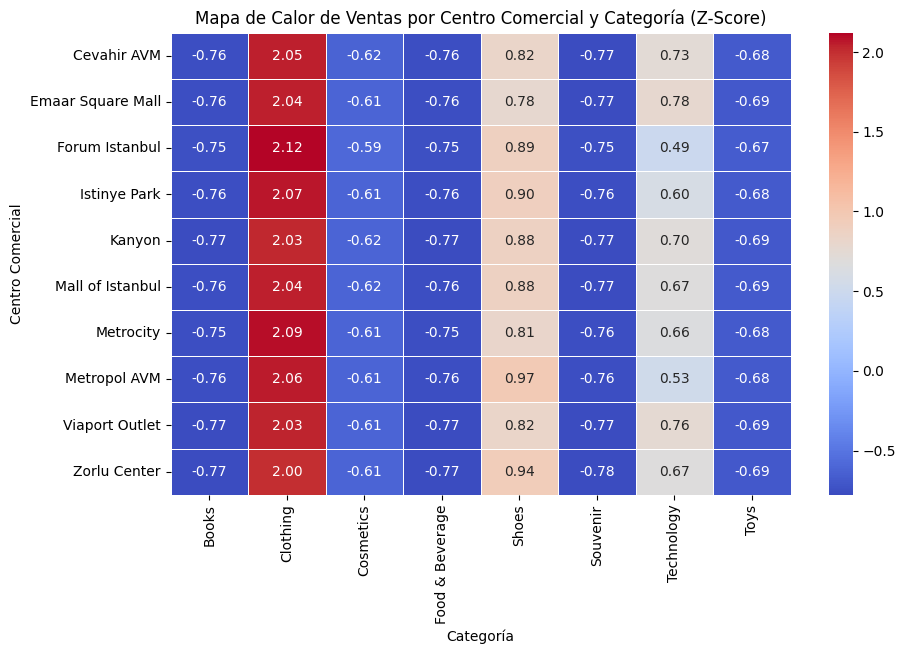

In [ ]:

# Aplicar Z-Score a la columna 'total_value' por centro comercial
df_grouped_mall_category['zscore_total_value'] = df_grouped_mall_category.groupby('shopping_mall')['total_value'].transform(zscore)

# Crear un mapa de calor (heatmap) con valores estandarizados
df_pivot_zscore = df_grouped_mall_category.pivot(index='shopping_mall', columns='category', values='zscore_total_value').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(df_pivot_zscore, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Configuración del gráfico
plt.xlabel("Categoría")
plt.ylabel("Centro Comercial")
plt.title("Mapa de Calor de Ventas por Centro Comercial y Categoría (Z-Score)")

# Mostrar la gráfica
plt.show()

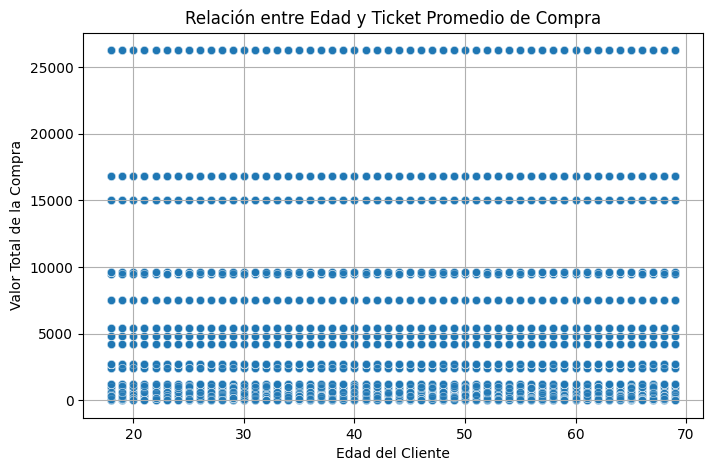

In [ ]:
plt.figure(figsize=(8,5))

# Graficar el diagrama de dispersión
sns.scatterplot(x=df['age'], y=df['total_value'], alpha=0.6)

# Configuración del gráfico
plt.xlabel("Edad del Cliente")
plt.ylabel("Valor Total de la Compra")
plt.title("Relación entre Edad y Ticket Promedio de Compra")
plt.grid()

# Mostrar la gráfica
plt.show()

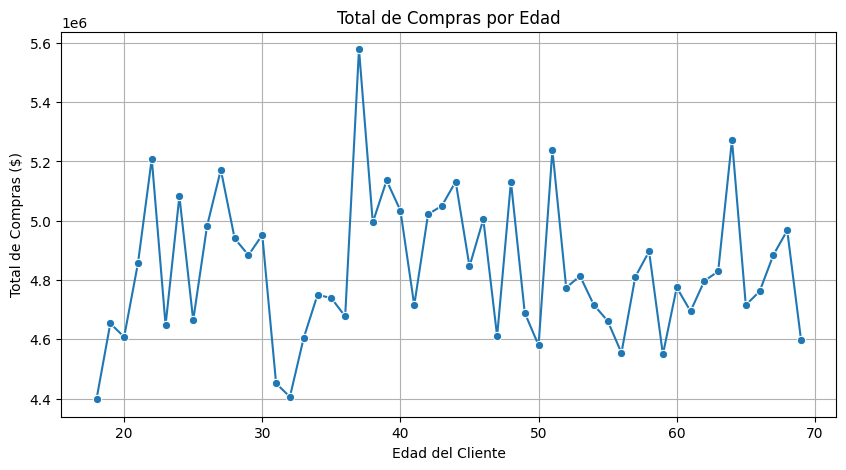

In [ ]:
df_total_purchase_by_age = df.groupby('age')['total_value'].sum().reset_index()

# Crear la figura y el eje
plt.figure(figsize=(10,5))

# Graficar la relación entre edad y total de compras
sns.lineplot(x=df_total_purchase_by_age['age'], y=df_total_purchase_by_age['total_value'], marker='o')

# Configuración del gráfico
plt.xlabel("Edad del Cliente")
plt.ylabel("Total de Compras ($)")
plt.title("Total de Compras por Edad")
plt.grid()

# Mostrar la gráfica
plt.show()

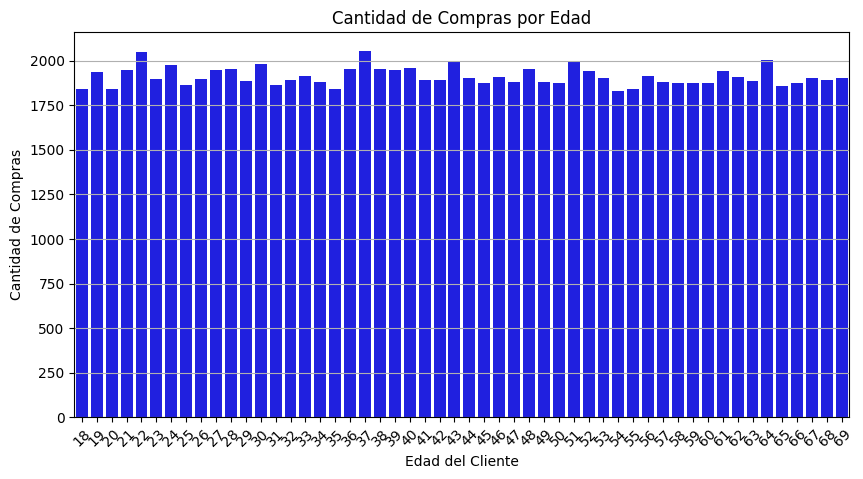

In [ ]:
df_purchases_by_age = df.groupby('age')['invoice_no'].count().reset_index()

# Crear el histograma
plt.figure(figsize=(10,5))
sns.barplot(x=df_purchases_by_age['age'], y=df_purchases_by_age['invoice_no'], color="blue")

# Configuración del gráfico
plt.xlabel("Edad del Cliente")
plt.ylabel("Cantidad de Compras")
plt.title("Cantidad de Compras por Edad")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

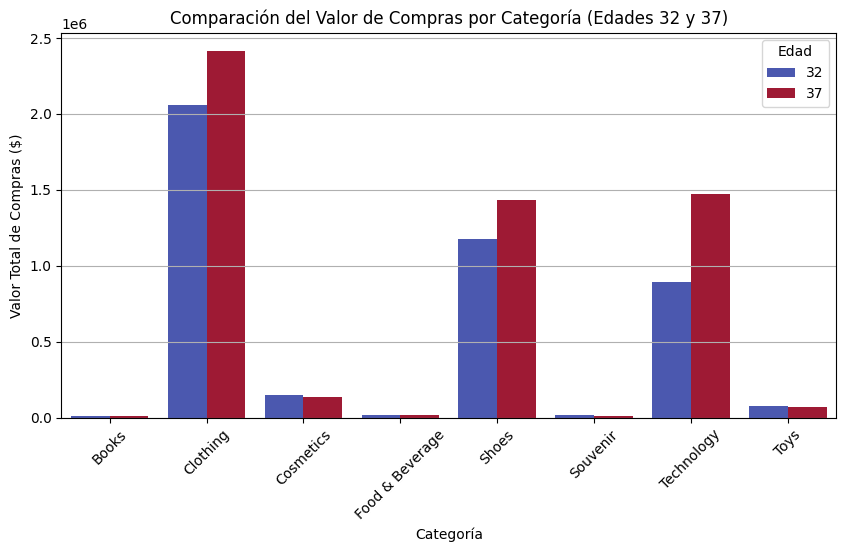

In [ ]:
df_filtered = df[df['age'].isin([32, 37])]

# Agrupar por edad y categoría, sumando el valor total vendido
df_grouped_age_category = df_filtered.groupby(['age', 'category'])['total_value'].sum().reset_index()

# Crear la figura y el eje
plt.figure(figsize=(10,5))

# Graficar las categorías por edad
sns.barplot(x='category', y='total_value', hue='age', data=df_grouped_age_category, palette="coolwarm")

# Configuración del gráfico
plt.xlabel("Categoría")
plt.ylabel("Valor Total de Compras ($)")
plt.title("Comparación del Valor de Compras por Categoría (Edades 32 y 37)")
plt.xticks(rotation=45)
plt.legend(title="Edad")
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

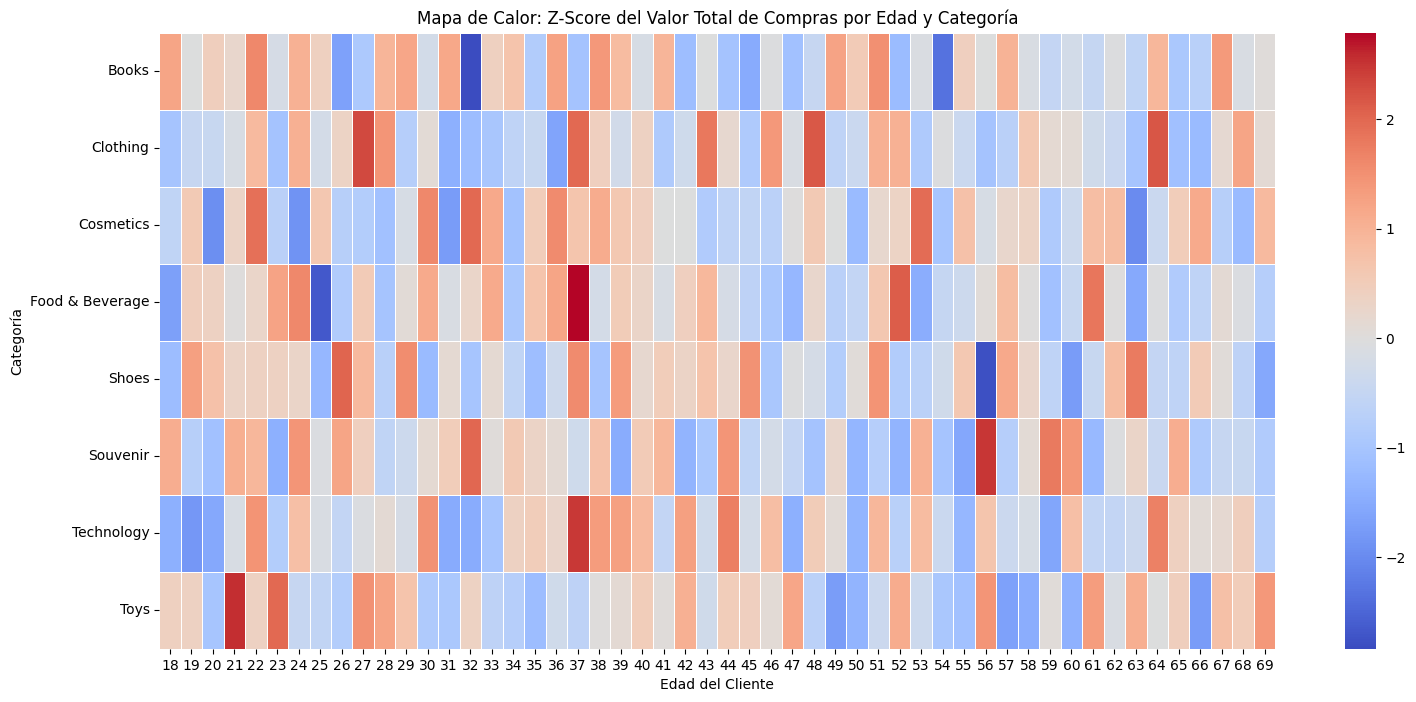

In [ ]:
df_grouped_age_category_heatmap = df.groupby(['category', 'age'])['total_value'].sum().unstack().fillna(0)

# Aplicar Z-Score por columnas (edades) para estandarizar correctamente
df_grouped_age_category_zscore = df_grouped_age_category_heatmap.T.apply(zscore, axis=0).T

# Crear la figura y el eje con mayor tamaño para mejor visibilidad
plt.figure(figsize=(18,8))

# Graficar el mapa de calor con valores estandarizados
sns.heatmap(df_grouped_age_category_zscore, cmap="coolwarm", annot=False, linewidths=0.5)

# Configuración del gráfico
plt.xlabel("Edad del Cliente")
plt.ylabel("Categoría")
plt.title("Mapa de Calor: Z-Score del Valor Total de Compras por Edad y Categoría")

# Mostrar la gráfica
plt.show()

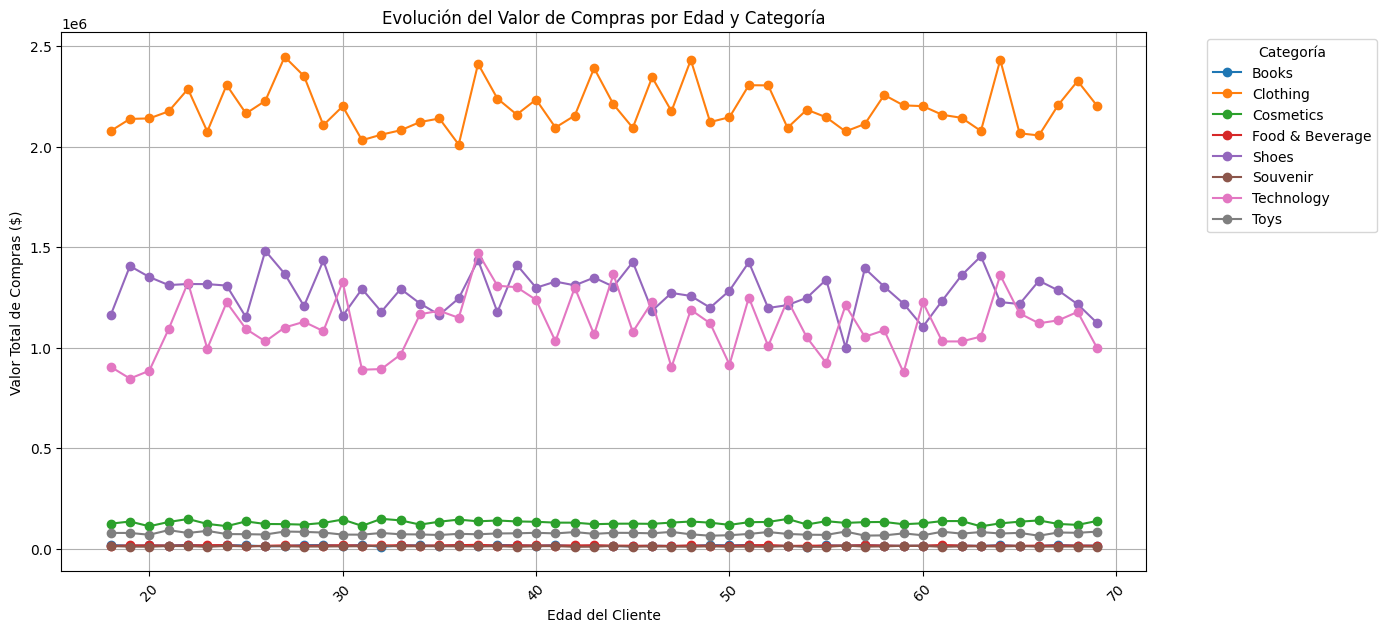

In [ ]:
df_grouped_age_category_line = df.groupby(['age', 'category'])['total_value'].sum().reset_index()

# Crear la figura y el eje
plt.figure(figsize=(14,7))

# Graficar líneas para cada categoría
for category in df_grouped_age_category_line['category'].unique():
    df_filtered = df_grouped_age_category_line[df_grouped_age_category_line['category'] == category]
    plt.plot(df_filtered['age'], df_filtered['total_value'], marker='o', linestyle='-', label=category)

# Configuración del gráfico
plt.xlabel("Edad del Cliente")
plt.ylabel("Valor Total de Compras ($)")
plt.title("Evolución del Valor de Compras por Edad y Categoría")
plt.xticks(rotation=45)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Mostrar la gráfica
plt.show()

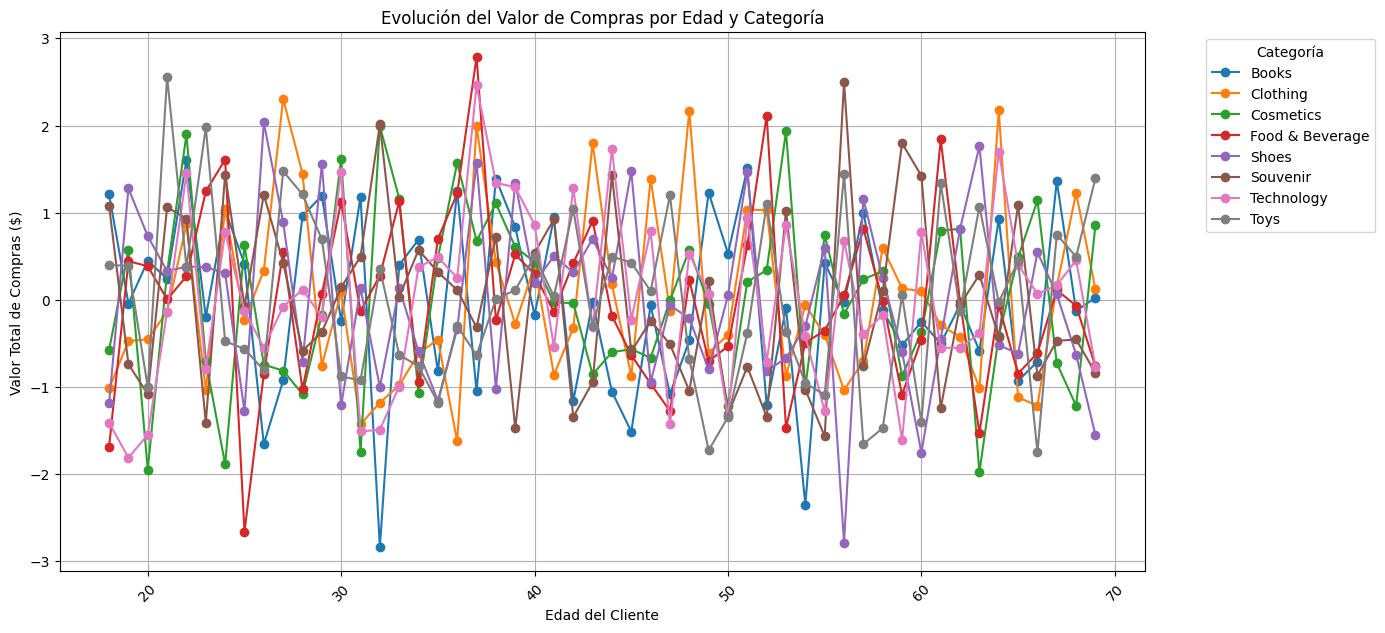

In [ ]:
df_grouped_age_category_line = df.groupby(['age', 'category'])['total_value'].sum().reset_index()

#zscore
df_grouped_age_category_line['zscore_price'] = df_grouped_age_category_line.groupby('category')['total_value'].transform(zscore)

# Crear la figura y el eje
plt.figure(figsize=(14,7))

# Graficar líneas para cada categoría
for category in df_grouped_age_category_line['category'].unique():
    df_filtered = df_grouped_age_category_line[df_grouped_age_category_line['category'] == category]
    plt.plot(df_filtered['age'], df_filtered['zscore_price'], marker='o', linestyle='-', label=category)

# Configuración del gráfico
plt.xlabel("Edad del Cliente")
plt.ylabel("Valor Total de Compras ($)")
plt.title("Evolución del Valor de Compras por Edad y Categoría")
plt.xticks(rotation=45)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Mostrar la gráfica
plt.show()

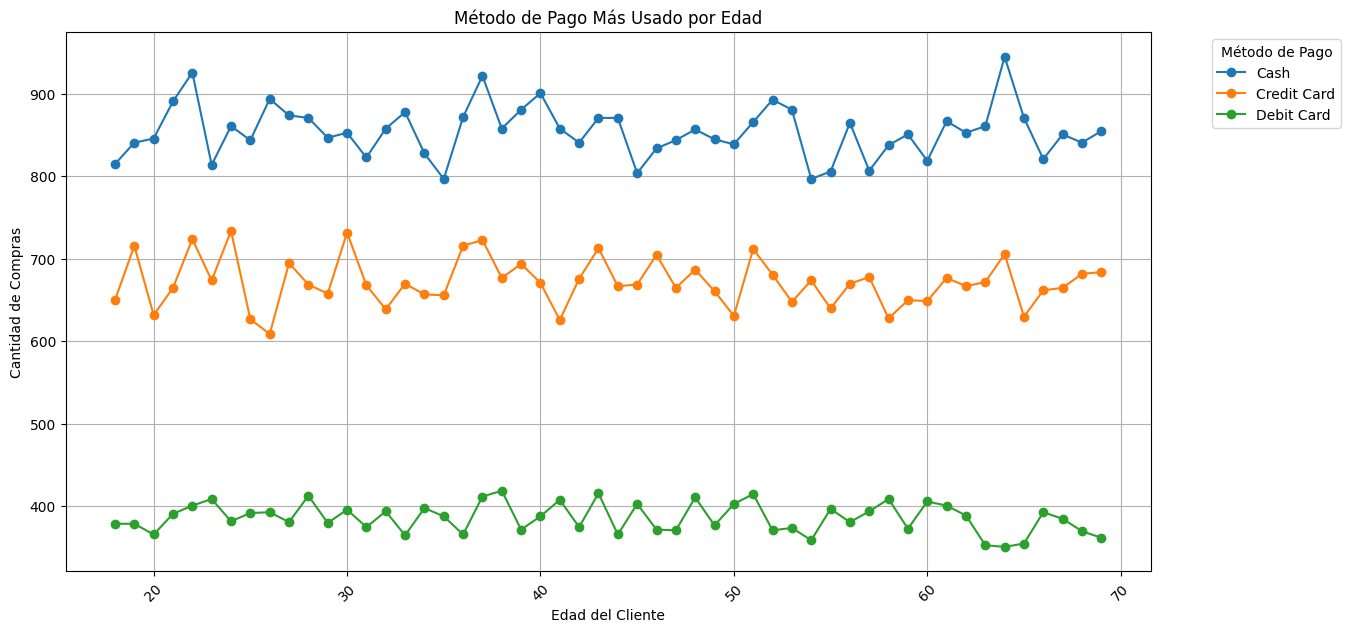

In [ ]:
# Agrupar por edad y método de pago, contando la cantidad de compras
df_grouped_age_payment = df.groupby(['age', 'payment_method'])['invoice_no'].count().reset_index()

# Crear la figura y el eje
plt.figure(figsize=(14,7))

# Graficar líneas para cada método de pago
for method in df_grouped_age_payment['payment_method'].unique():
    df_filtered = df_grouped_age_payment[df_grouped_age_payment['payment_method'] == method]
    plt.plot(df_filtered['age'], df_filtered['invoice_no'], marker='o', linestyle='-', label=method)

# Configuración del gráfico
plt.xlabel("Edad del Cliente")
plt.ylabel("Cantidad de Compras")
plt.title("Método de Pago Más Usado por Edad")
plt.xticks(rotation=45)
plt.legend(title="Método de Pago", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Mostrar la gráfica
plt.show()